In [1]:
# https://strawberryfields.ai/photonics/demos/run_gate_visualization.html

import time

import strawberryfields as sf
from strawberryfields.ops import *

import numpy as np
from numpy import pi, sqrt
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [53]:
# # set the random seed
# np.random.seed(42)

prog = sf.Program(3)

r = 0.0 / 2.0
phi = pi / 2.0

with prog.context as q:
    # prepare initial states
    Coherent(r, phi) | q[0]
    Squeezed(-2) | q[1]
    Squeezed(2) | q[2]

    # apply gates
    BS = BSgate(pi/4, pi)
    BS | (q[1], q[2])
    BS | (q[0], q[1])

    # Perform homodyne measurements
    MeasureX | q[0]
    MeasureP | q[1]

    # Displacement gates conditioned on
    # the measurements
    Xgate(sqrt(2) * q[0].par) | q[2]
    Zgate(sqrt(2) * q[1].par) | q[2]

eng = sf.Engine('gaussian')

result = eng.run(prog, shots=1, modes=None, compile_options={})

print(result.samples)

[[1.7817474  5.82836039]]


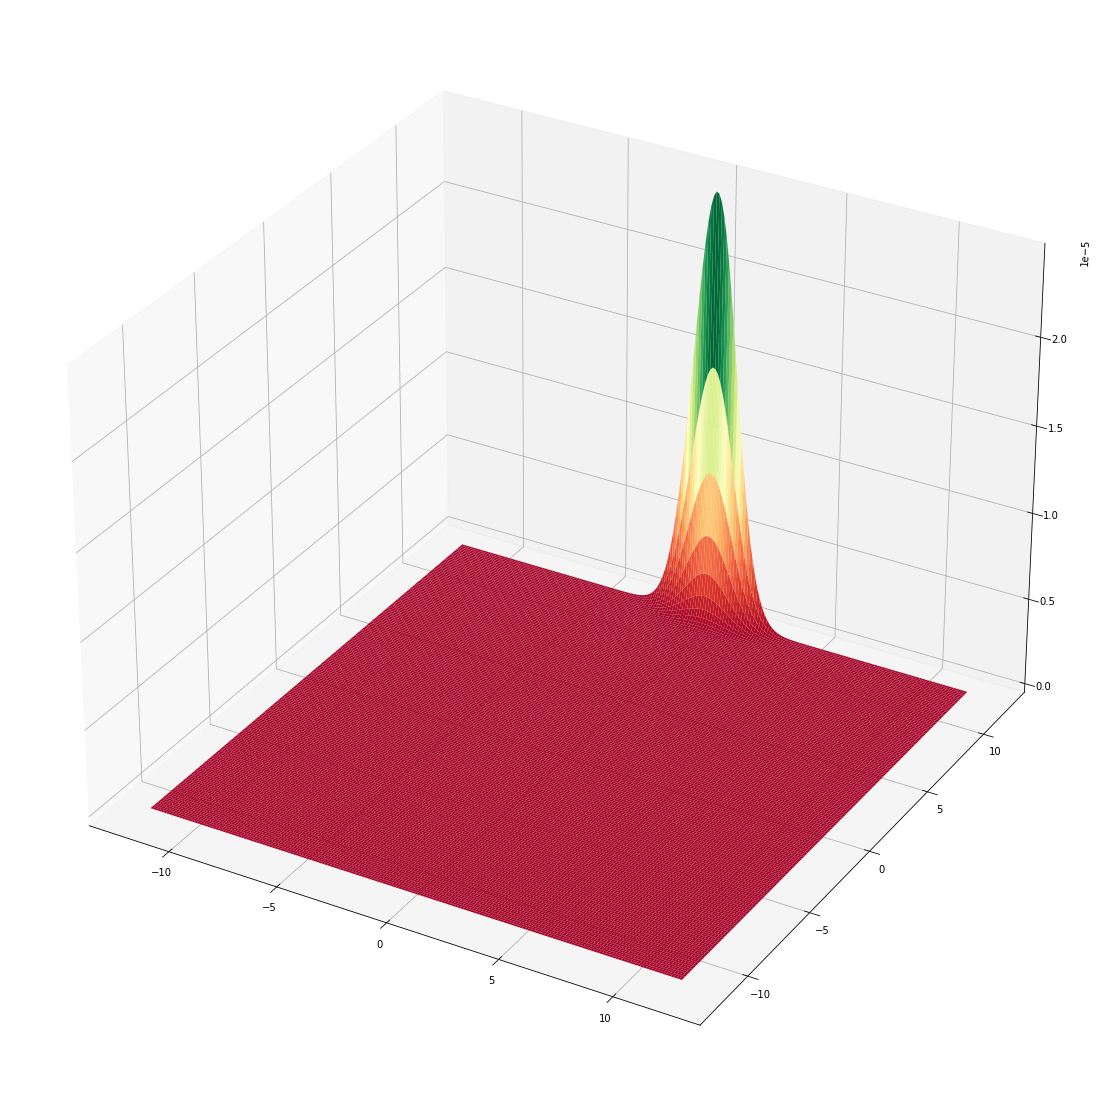

In [54]:
fig = plt.figure()
X = np.linspace(-12, 12, 200)
P = np.linspace(-12, 12, 200)
Z = result.state.wigner(2, X, P)
X, P = np.meshgrid(X, P)
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(X, P, Z, cmap="RdYlGn", lw=0.5, rstride=1, cstride=1)
fig.set_size_inches(20.0, 20.0)
#ax.set_axis_off()